# 1. Import and Loading 
--- 

### 1.1 Importing data and files from `1_data-understanding` notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26220 entries, 0 to 26219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              26220 non-null  datetime64[ns]
 1   NodeID            26220 non-null  int64         
 2   MotorCurrent      26220 non-null  float64       
 3   Frequency         26220 non-null  float64       
 4   PIP               26220 non-null  float64       
 5   TubingPressure    26220 non-null  float64       
 6   CasingPressure    26220 non-null  float64       
 7   PIT               26220 non-null  float64       
 8   MotorTemperature  26220 non-null  float64       
 9   XVib              26220 non-null  float64       
 10  Label             26220 non-null  int64         
 11  Time              26220 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 2.4+ MB


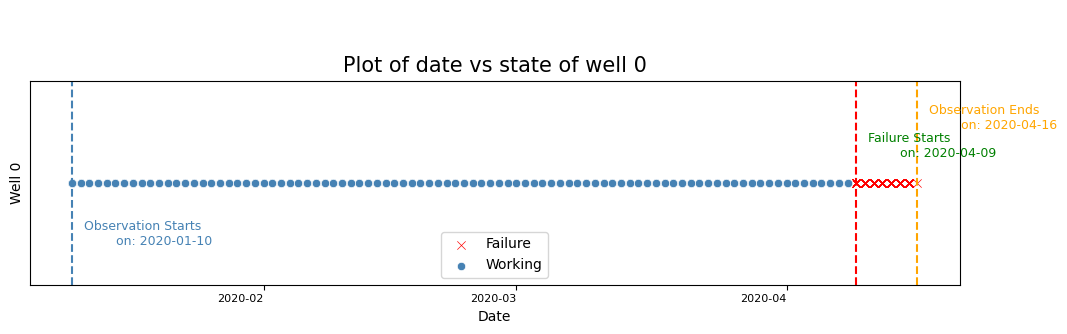

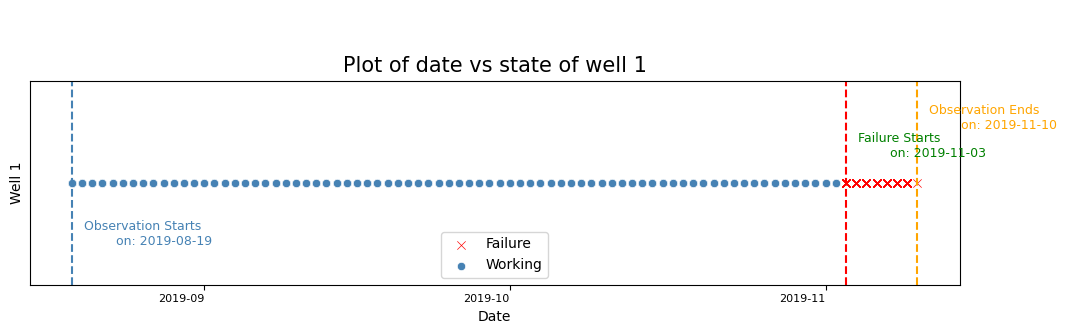

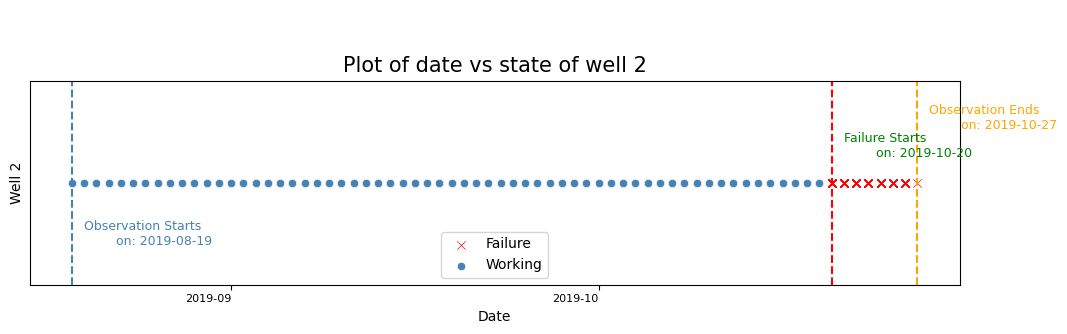

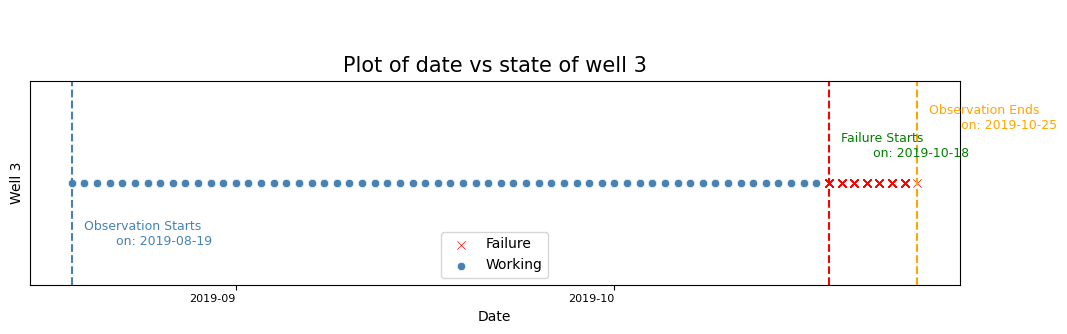

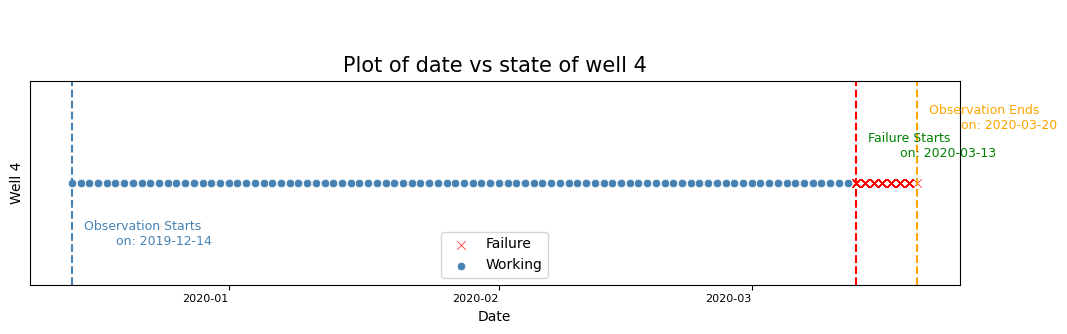

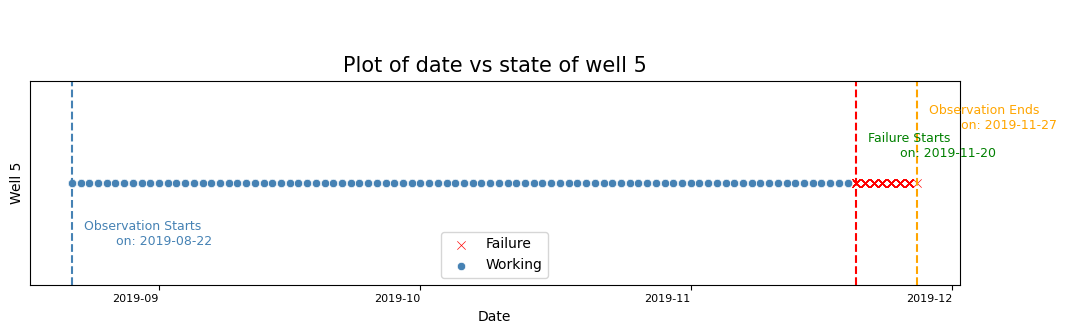

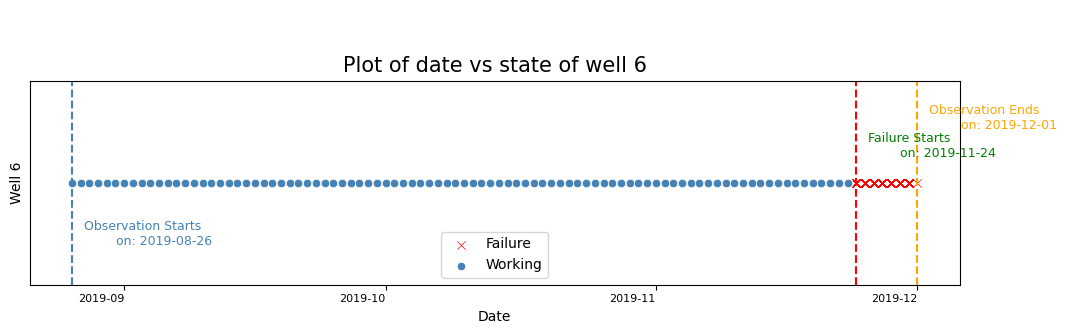

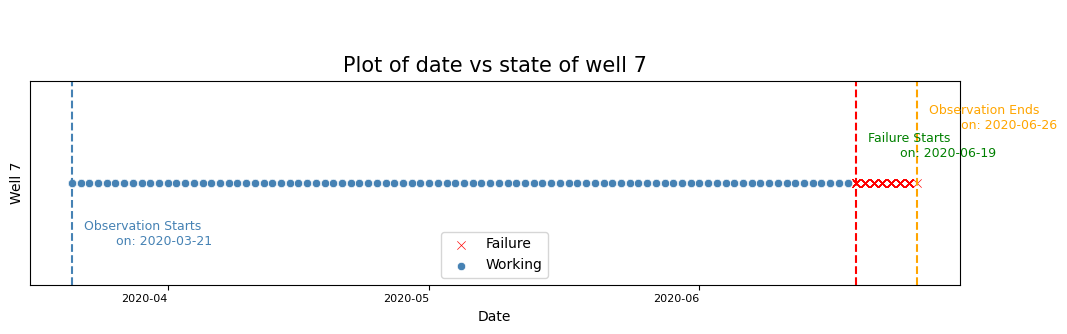

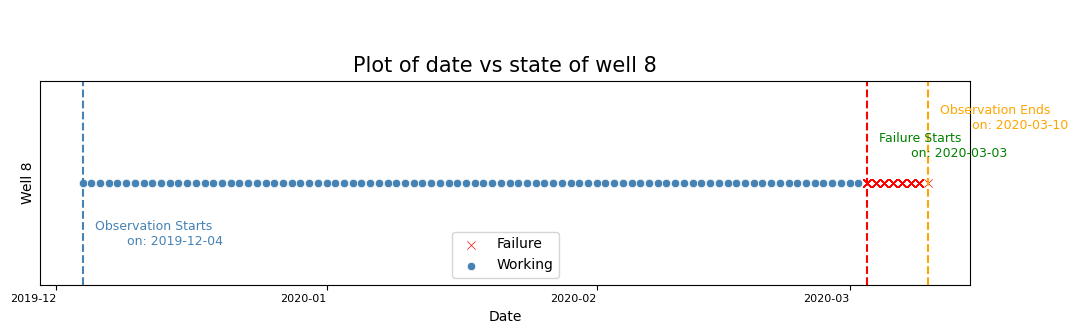

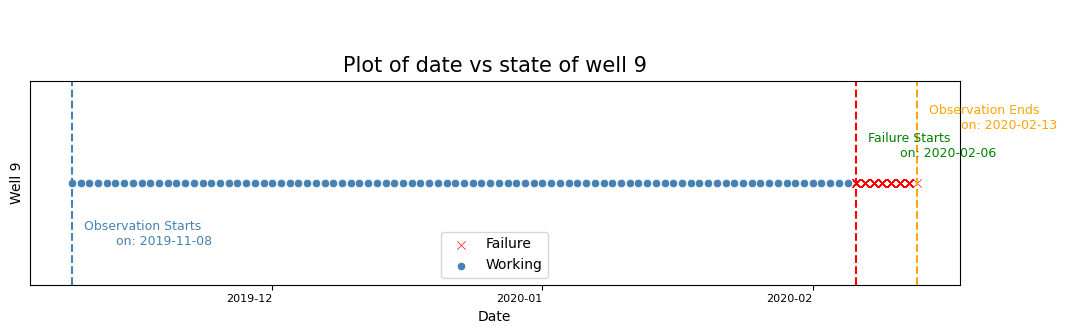

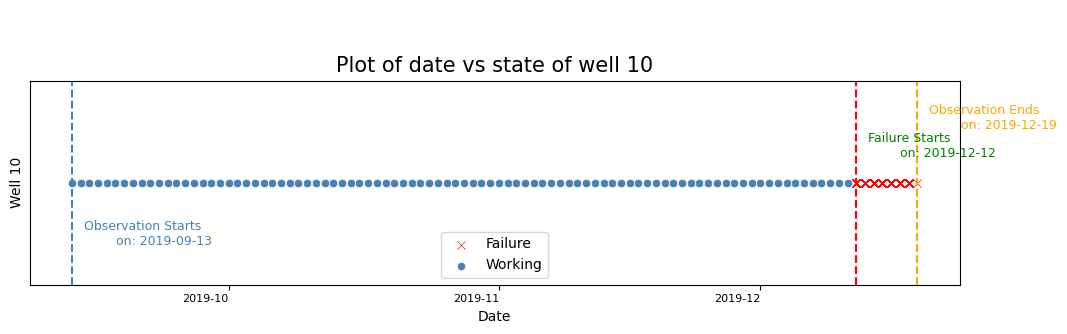

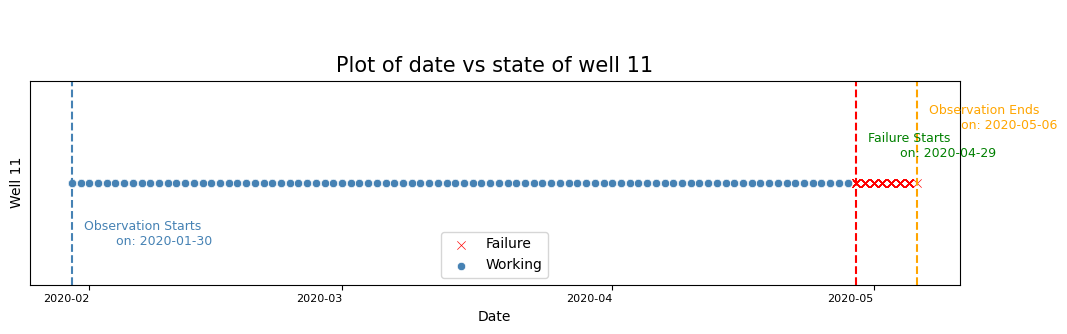

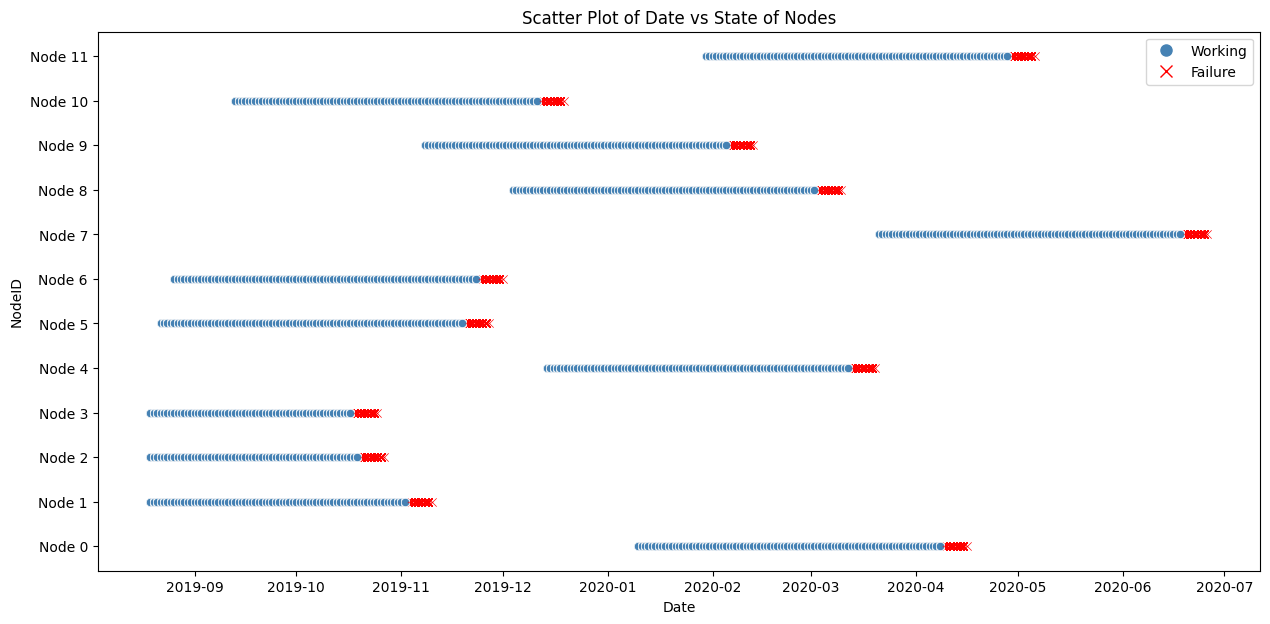

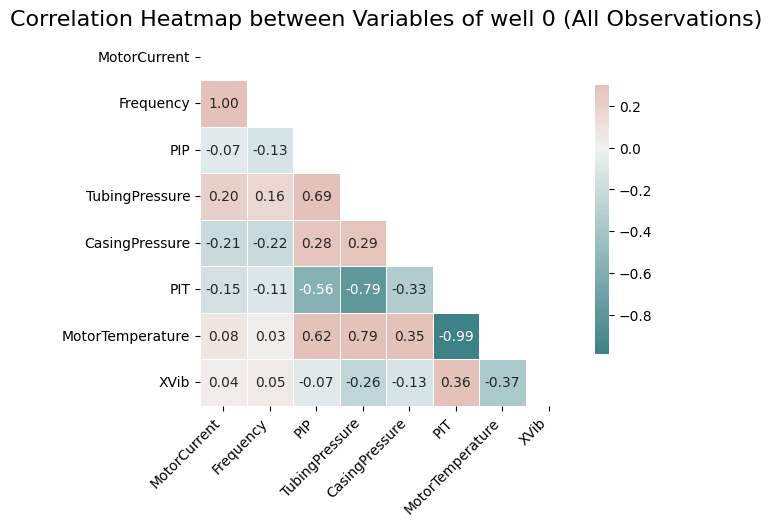

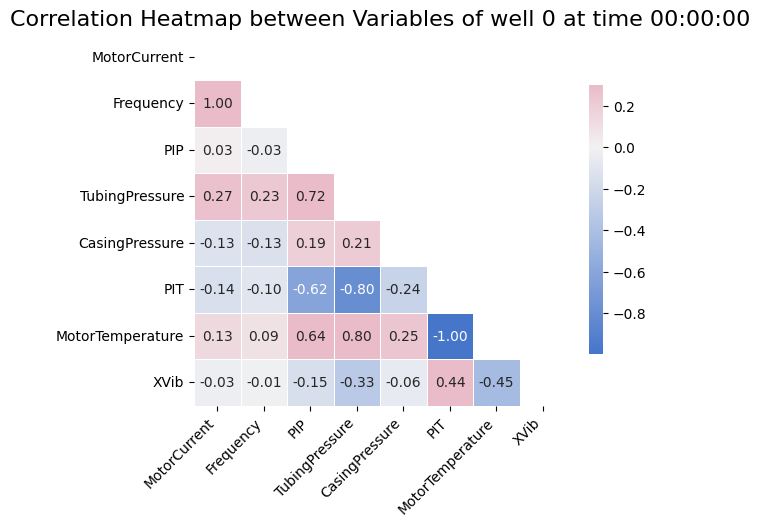

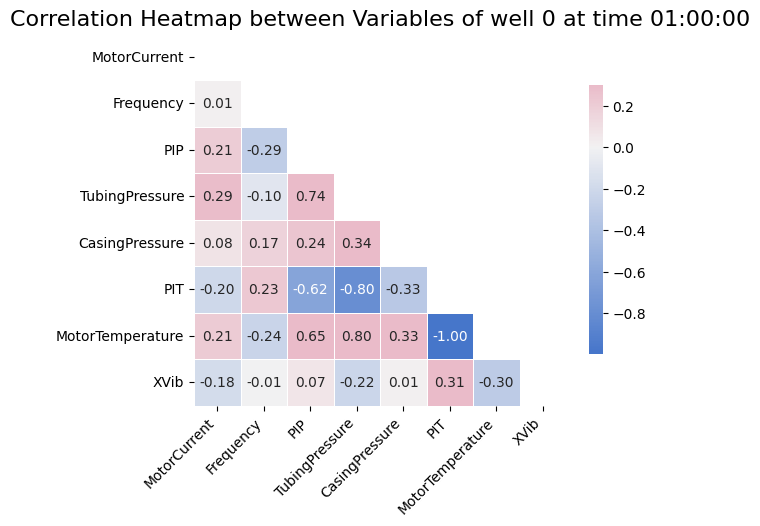

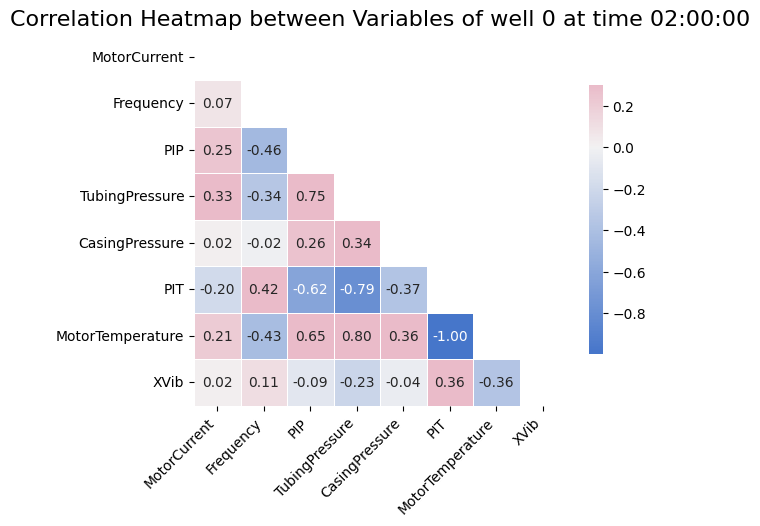

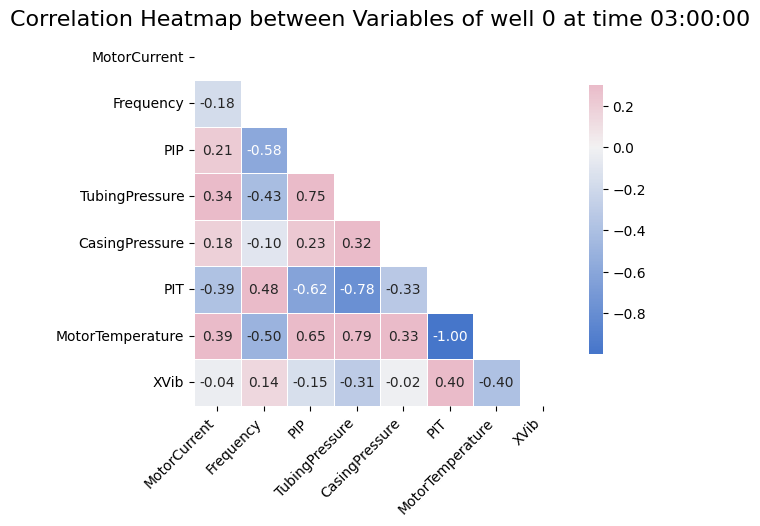

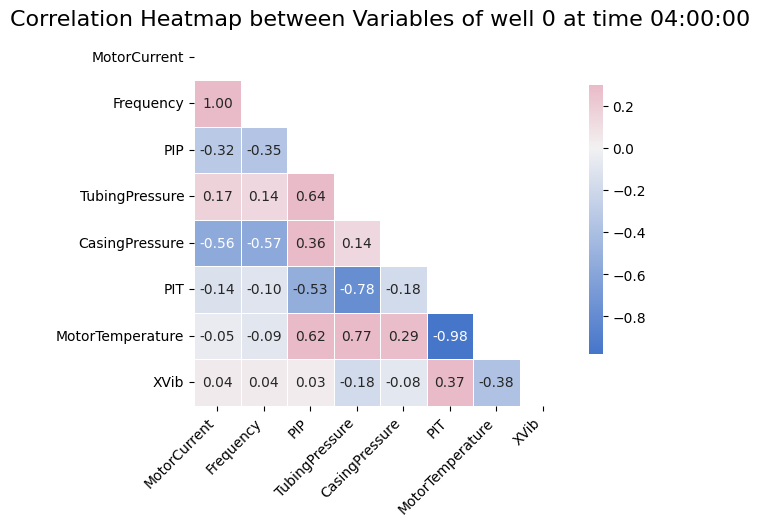

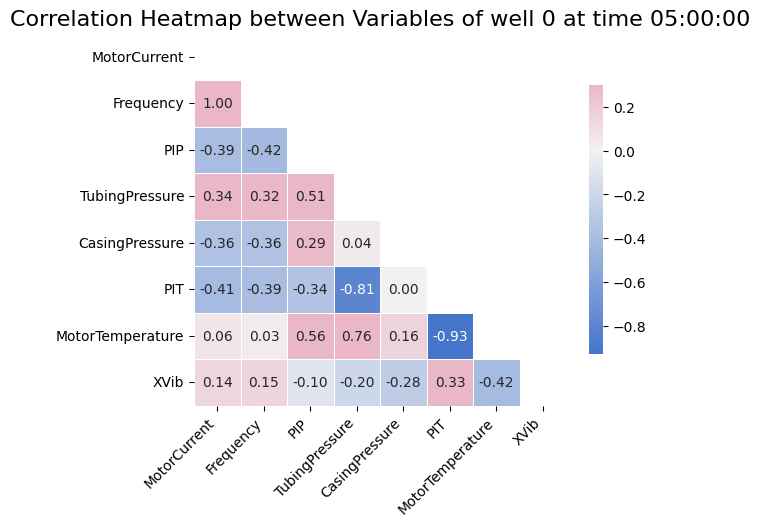

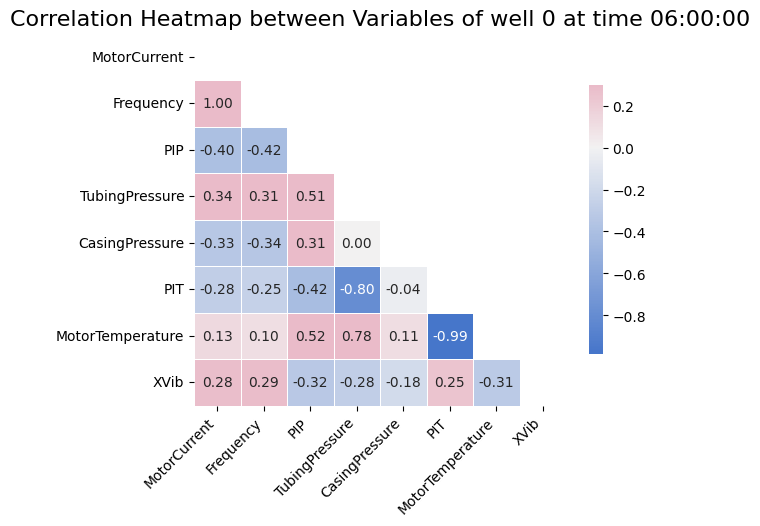

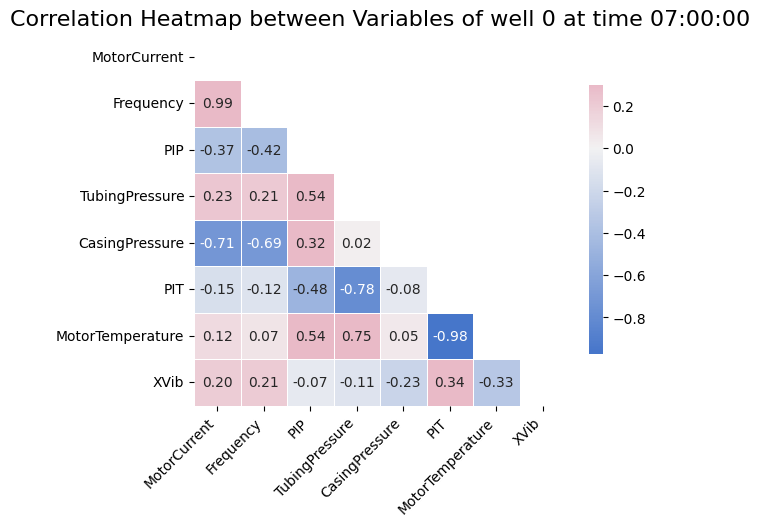

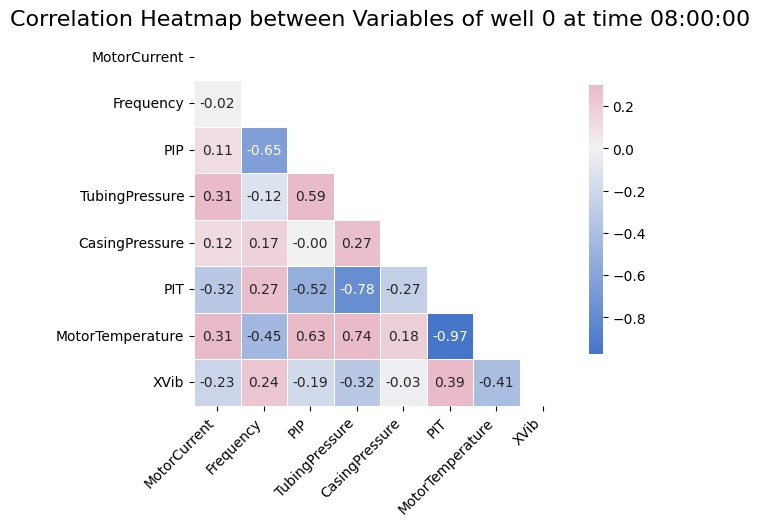

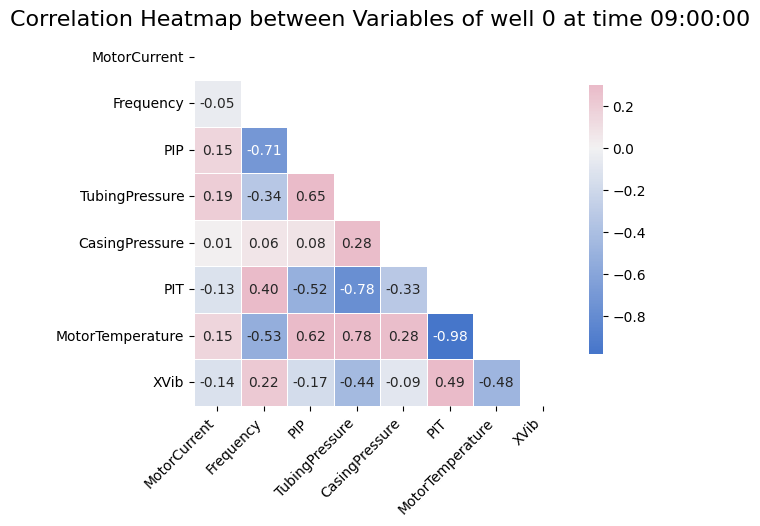

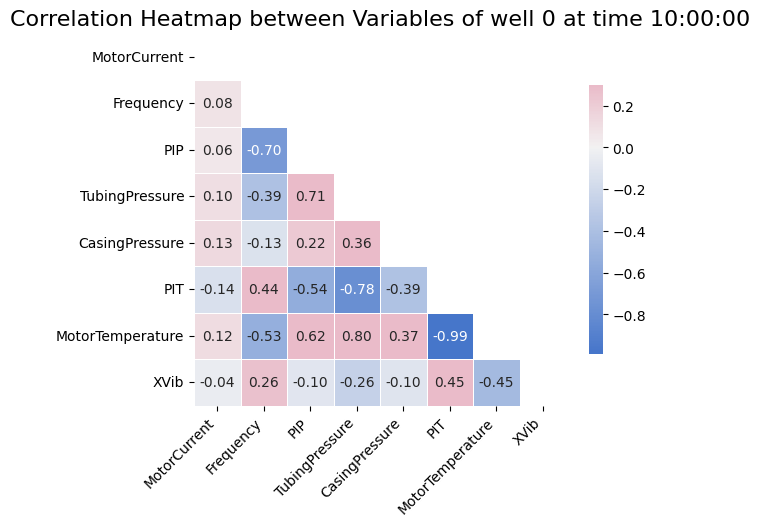

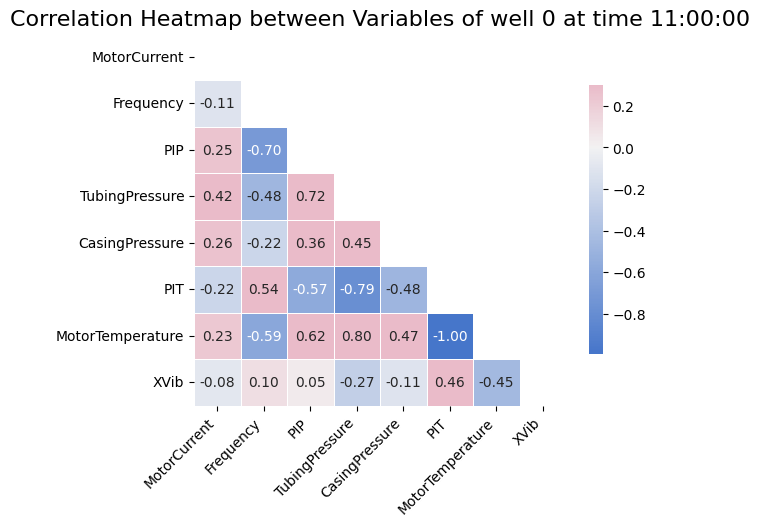

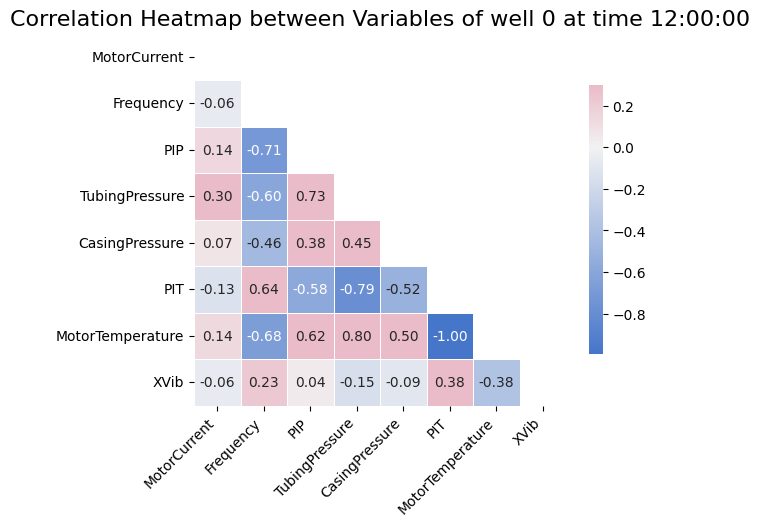

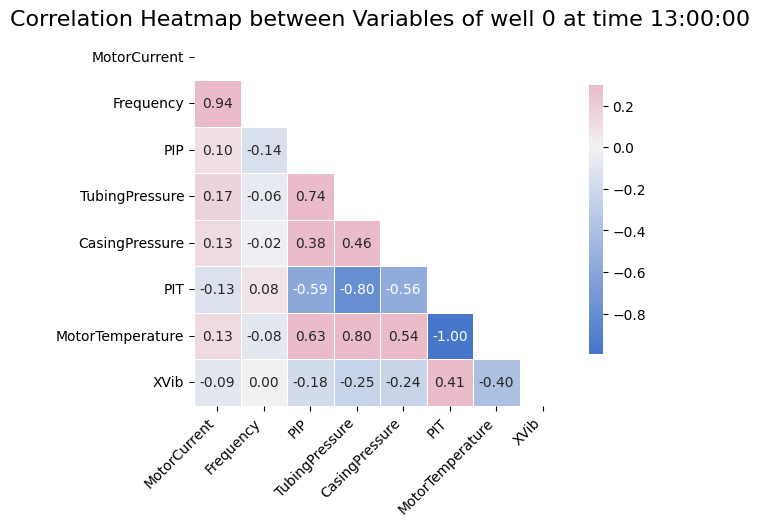

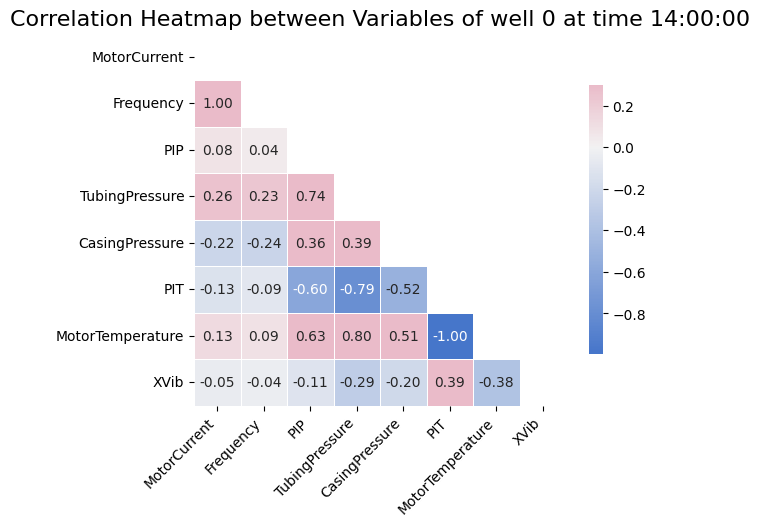

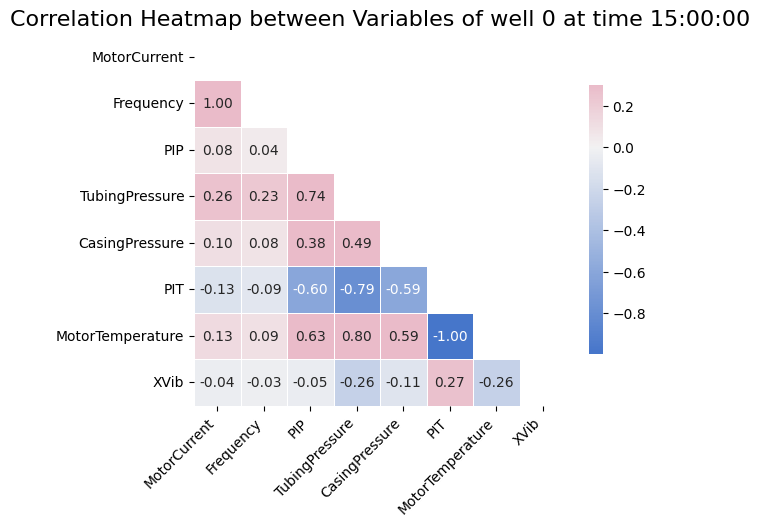

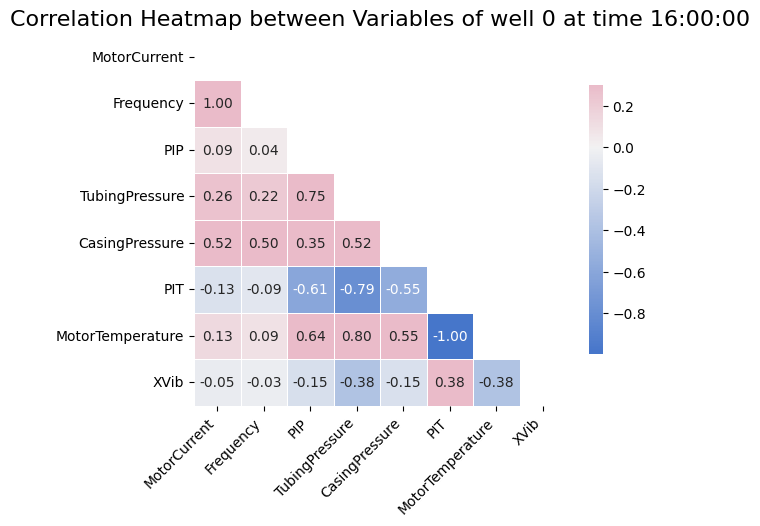

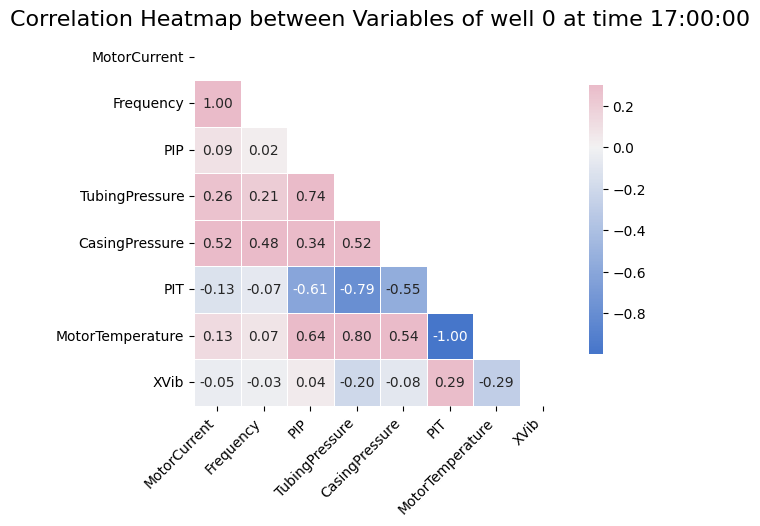

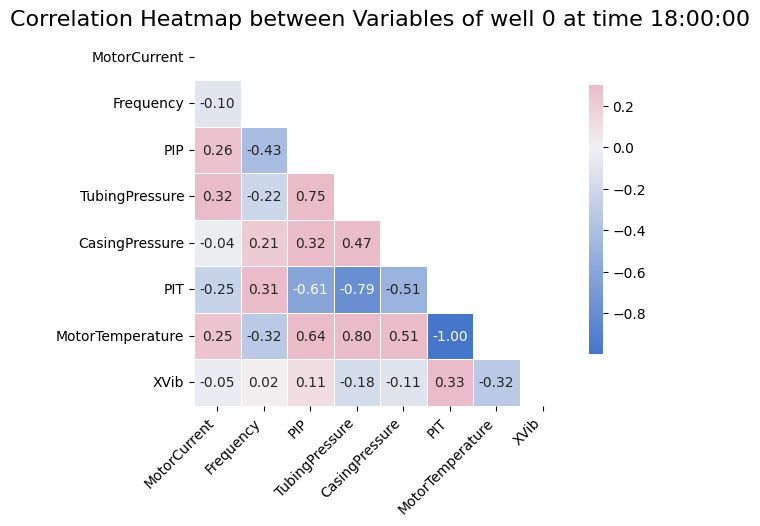

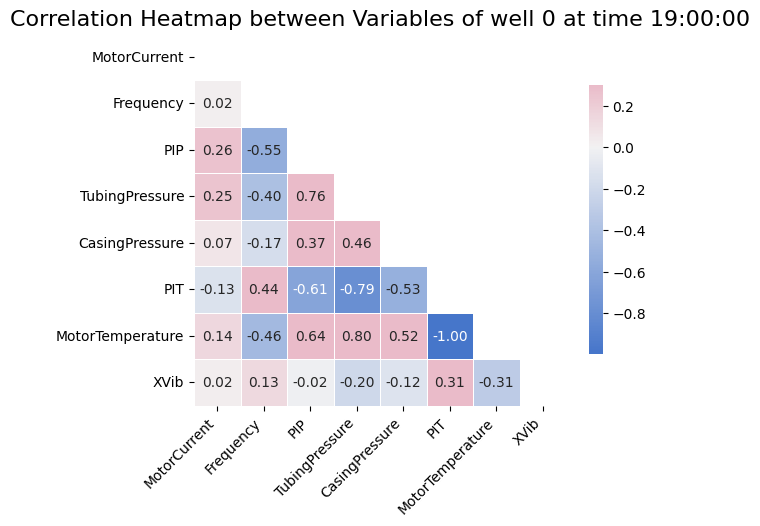

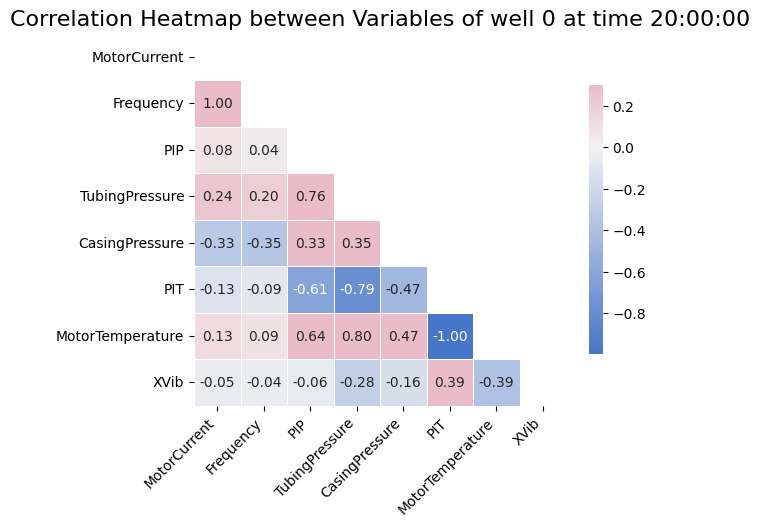

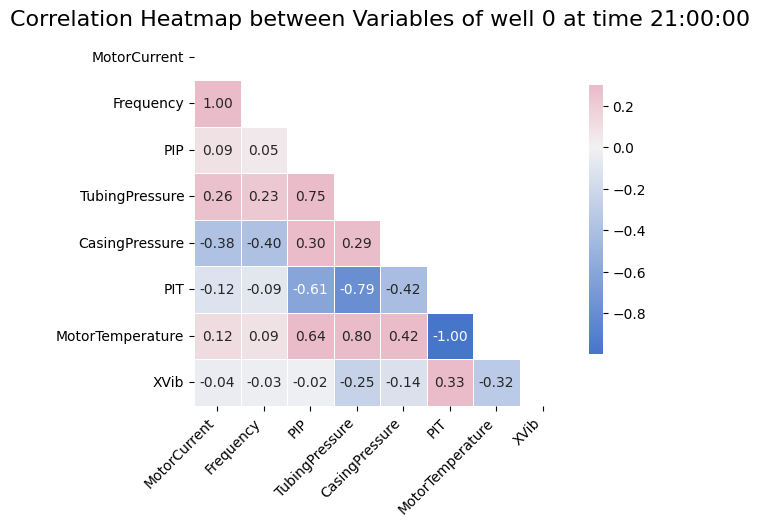

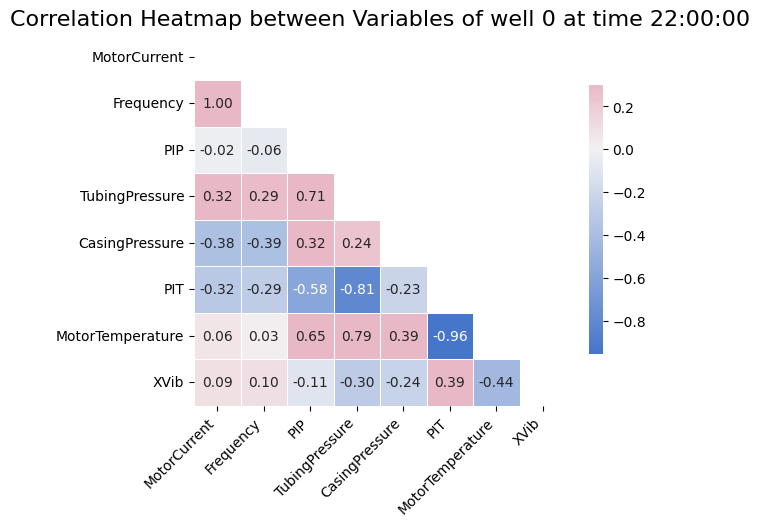

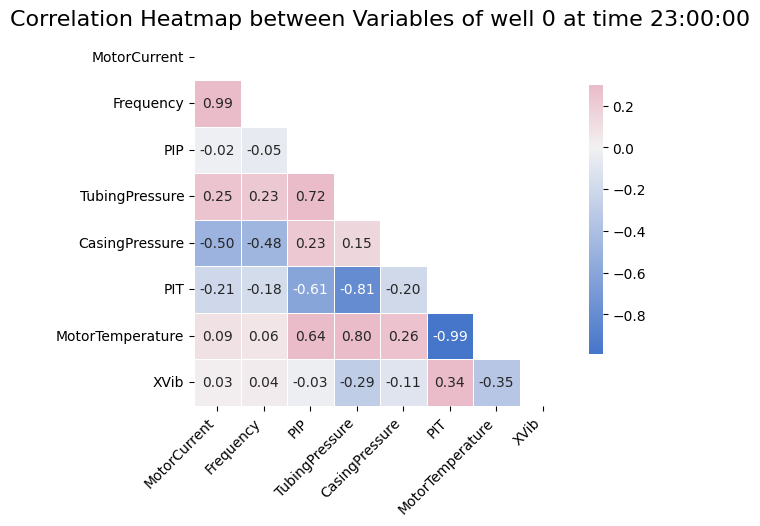

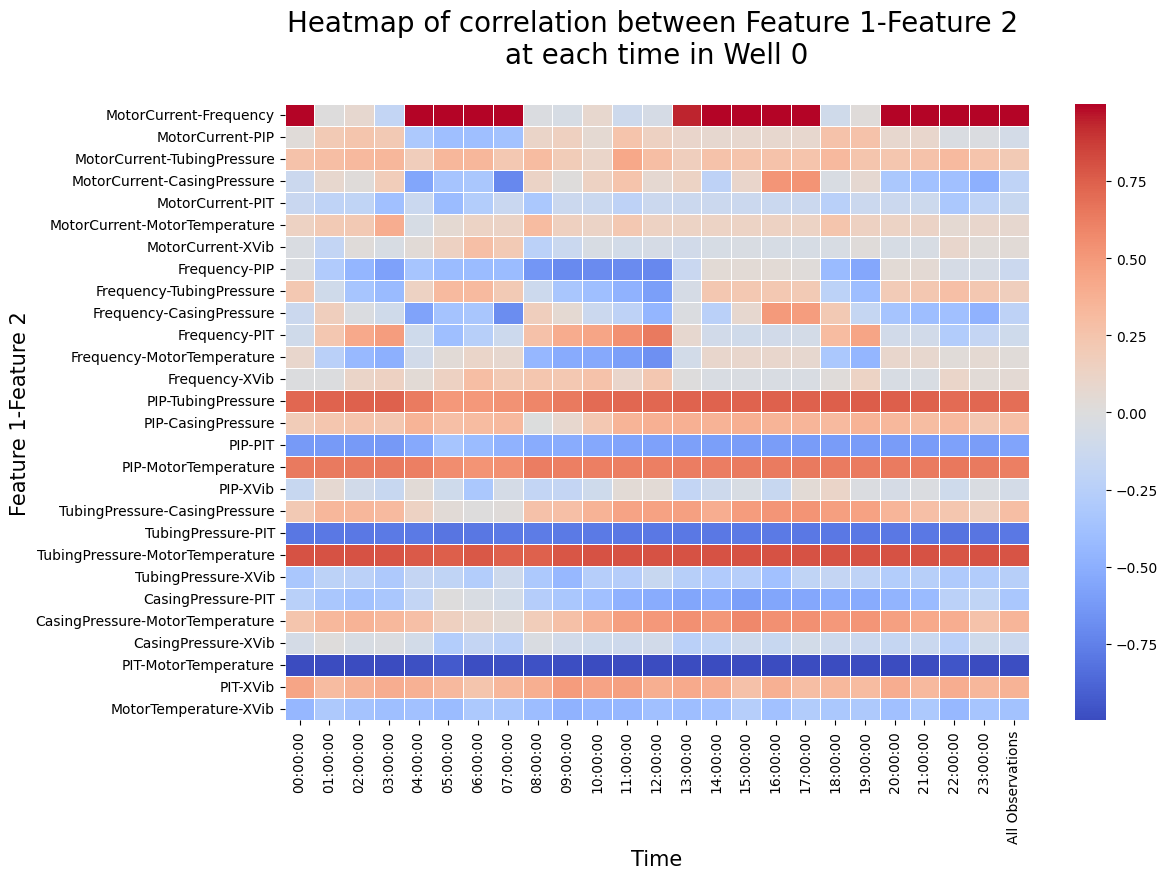

In [1]:
%run 1_data-understanding.ipynb

### 1.2 Importing More Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Logistic Modelling

## 2. Loading `Well 0` at 00:00:00 observation for modelling
--- 

### 2.1 Filtering `Well 0` observations

In [3]:
subdfs[0].head()

,Date,NodeID,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib,Label,Time
0,2020-01-10,0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845,0,00:00:00
1,2020-01-10,0,0.688889,0.920676,0.324346,0.413583,0.039333,0.800865,0.833500,0.005233,0,01:00:00
2,2020-01-10,0,0.687037,0.920676,0.324301,0.399392,0.039333,0.800865,0.833500,0.004651,0,02:00:00
3,2020-01-10,0,0.688889,0.919258,0.323632,0.399392,0.039758,0.800865,0.832795,0.004651,0,03:00:00
4,2020-01-10,0,0.688889,0.927769,0.327327,0.399392,0.044000,0.802338,0.835799,0.004651,0,04:00:00


### 2. Filtering observations at time `00:00:00` in `Well 0`

In [4]:
subdf_0_at_00 = subdf_by_time['00:00:00']
subdf_0_at_00.head()

,Date,NodeID,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib,Label,Time
0,2020-01-10,0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845,0,00:00:00
24,2020-01-11,0,0.691111,0.920676,0.322395,0.454131,0.048667,0.800865,0.834352,0.004651,0,00:00:00
48,2020-01-12,0,0.688889,0.920676,0.317121,0.482514,0.044000,0.800865,0.832248,0.003876,0,00:00:00
72,2020-01-13,0,0.688889,0.920676,0.312288,0.458861,0.044000,0.800865,0.832499,0.004845,0,00:00:00
96,2020-01-14,0,0.688889,0.920676,0.310075,0.454131,0.039333,0.800865,0.832248,0.004457,0,00:00:00


## 3. Splitting the dataset into `X` and `y` for training 

> **Note 1:** I am assuming the relationship between X and y to be independent of time. Hence not including the Date feature.
>
> **Note 2:** I am also dropping NodeID and Time features. As, Since all the observation are from same node and at same time and variance will be zero and will not contribute to model.

In [5]:
X = subdf_0_at_00[['MotorCurrent', 'Frequency', 'PIP', 'TubingPressure',
       'CasingPressure', 'PIT', 'MotorTemperature', 'XVib']]
y = subdf_0_at_00['Label']

In [6]:
X.head()

,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib
0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845
24,0.691111,0.920676,0.322395,0.454131,0.048667,0.800865,0.834352,0.004651
48,0.688889,0.920676,0.317121,0.482514,0.044000,0.800865,0.832248,0.003876
72,0.688889,0.920676,0.312288,0.458861,0.044000,0.800865,0.832499,0.004845
96,0.688889,0.920676,0.310075,0.454131,0.039333,0.800865,0.832248,0.004457


In [7]:
y

0       0
24      0
48      0
72      0
96      0
       ..
2232    1
2256    1
2280    1
2304    1
2328    1
Name: Label, Length: 98, dtype: int64

### 3.1 Train-Test Split: Stratified 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (78, 8)
y_train: (78,)

Testing set shapes:
X_test: (20, 8)
y_test: (20,)


In [9]:
subdf_0_at_00

,Date,NodeID,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib,Label,Time
0,2020-01-10,0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845,0,00:00:00
24,2020-01-11,0,0.691111,0.920676,0.322395,0.454131,0.048667,0.800865,0.834352,0.004651,0,00:00:00
48,2020-01-12,0,0.688889,0.920676,0.317121,0.482514,0.044000,0.800865,0.832248,0.003876,0,00:00:00
72,2020-01-13,0,0.688889,0.920676,0.312288,0.458861,0.044000,0.800865,0.832499,0.004845,0,00:00:00
96,2020-01-14,0,0.688889,0.920676,0.310075,0.454131,0.039333,0.800865,0.832248,0.004457,0,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2020-04-12,0,0.689630,0.932640,0.245224,0.243284,0.036667,0.830046,0.775163,0.004651,1,00:00:00
2256,2020-04-13,0,0.687963,0.929519,0.245224,0.243284,0.036667,0.830046,0.775163,0.004651,1,00:00:00
2280,2020-04-14,0,0.689259,0.931079,0.245224,0.271668,0.046000,0.830046,0.775163,0.004651,1,00:00:00
2304,2020-04-15,0,0.686263,0.933727,0.245224,0.243284,0.036667,0.830046,0.775163,0.004651,1,00:00:00


# 5. Logistic Regression Model over Original Data 

### 5.1 Model Fitting 

In [10]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### 5.1.1 Coefficients of Model

In [11]:
coefficients_df = pd.DataFrame({'Feature': X.columns , 'Coefficient': lr_model.coef_[0]})
coefficients_df

,Feature,Coefficient
0,MotorCurrent,0.038127
1,Frequency,0.101619
2,PIP,-0.107422
3,TubingPressure,-0.703028
4,CasingPressure,-0.016422
5,PIT,0.098496
6,MotorTemperature,-0.197022
7,XVib,0.001978


In [12]:
print("Intercept Value:", lr_model.intercept_[0])

Intercept Value: -2.237683624808585


### 5.2 Performance Metric 

In [13]:
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df.T

,0,1,2,3
Metric,Accuracy,Precision,Recall,F1-score
Value,0.9,1.0,0.0,0.0


### 5.3 Confusion Matrix

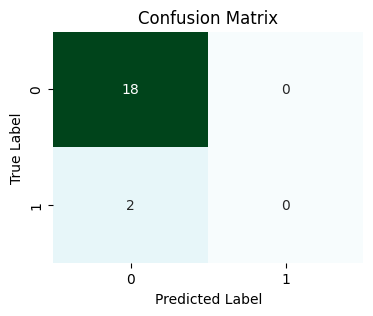

In [14]:
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 6. Logistic Regression using StatsModels library

In [15]:
X = subdf_0_at_00[['MotorCurrent', 'PIP', 'TubingPressure', 'CasingPressure', 'MotorTemperature', 'XVib']]
y = subdf_0_at_00['Label']

X = sm.add_constant(X)
log_reg = sm.GLM(y, X, family=sm.families.Binomial()).fit()

print(log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                   98
Model:                            GLM   Df Residuals:                       91
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.071
Date:                Wed, 31 Jan 2024   Deviance:                       36.142
Time:                        16:50:35   Pearson chi2:                     47.1
No. Iterations:                    27   Pseudo R-squ. (CS):             0.1786
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1641.4372   3.35e+06  

# 6 Logistic Regression Modelling with PCA 

### 6.0 Function for this section

In [42]:
def get_varcov_and_plot_heatmap(data, features, label_column, wellno, time):
    if time is None:
        time = "00:00:00 to 23"
    if wellno is None:
        wellno = "0-11"
        
    X = data[features]
    y = data[label_column]
    
    cov_matrix = np.cov(X, rowvar=False, dtype = float)

    plt.figure(figsize=(12, 8))
    sns.heatmap(cov_matrix, cmap='coolwarm', fmt=".4f", annot=True, linewidths=.5)
    plt.xticks(range(len(features)), features, rotation=45, ha='right', fontsize=12)
    plt.yticks(range(len(features)), features, rotation=0, va='center', fontsize=12)
    plt.title(f'Heatmap of covariance between features at \nat time {time}:00:00 in Well {wellno}\n', fontsize = 20)
    plt.xlabel("Features", fontsize = 15)
    plt.ylabel("Features", fontsize = 15)
    plt.show()
    return cov_matrix


def eigenvalues_and_eigenvectors(cov_matrix):
    cov_matrix = np.array(cov_matrix, dtype=float)
    
    if cov_matrix.shape[0] != cov_matrix.shape[1]:
        raise ValueError("Covariance matrix must be square.")
    
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    
    print('Eigenvalues:', eigenvalues)
    print('\nCumulative Variance:', cumulative_variance)
    print('\nEigenvectors:', eigenvectors)
    
    return eigenvalues, eigenvectors


def scree_plot(eigenvalues, wellno, time):
    if time is None:
        time = "00:00:00 to 23"
    if wellno is None:
        wellno = "0-11"
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', color='steelblue', label='Cumulative Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Cumulative Variance')
    plt.title(f'Scree plot for PC of well {wellno} at time {time}:00:00')
    plt.legend()
    plt.show


def get_pca_data(data, y, features, eigenvectors, k):
    selected_components = eigenvectors[:, :k]
    pca_data = np.dot(data[features], selected_components)
    pca_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(k)])
    y_renamed = y.rename('Label')
    pca_df = pd.DataFrame(np.concatenate([pca_data.values, y_renamed.values.reshape(-1, 1)], axis=1),
                        columns=list(pca_data.columns) + ['Label'])
    pca_df['Label'] = pca_df['Label'].astype(int)
    return pca_df

def create_stratified_train_test_data(data, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(data.index)
    split_index = int(len(indices) * (1 - test_size))

    # Split the data into train and test
    train_data = data.iloc[indices[:split_index]]
    test_data = data.iloc[indices[split_index:]]

    print("Train Data:")
    print(train_data['Label'].value_counts())
    print(f"Shape of train data: {train_data.shape}\n")

    print("Test Data:")
    print(test_data['Label'].value_counts())
    print(f"Shape of test data: {test_data.shape}\n")

    return train_data, test_data


def logreg_model(train_data, label_column):
    X = train_data.drop(label_column, axis=1)
    X = sm.add_constant(X)
    y = train_data[label_column]
    
    log_reg = sm.GLM(y, X, family=sm.families.Binomial()).fit()
    print(log_reg.summary())
    return log_reg

def predict_logreg(log_reg, test_data, label_column):
    X_test = test_data.drop(label_column, axis=1)
    X_test = sm.add_constant(X_test)
    y_pred_prob = log_reg.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return y_pred

def evaluate_model(y_true, y_pred):  
    cm = confusion_matrix(y_true, y_pred)

    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix}')
    plt.show()

    # Calculate and print accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1) 

    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')

### $\textbf{6.1 Well 0 at time 00:00:00}$

In [43]:
wellno = 0
time = 0

features = ['MotorCurrent', 'PIP', 'TubingPressure', 'CasingPressure', 'MotorTemperature', 'XVib']
label_column = 'Label'

data = subdf_by_time['00:00:00']
y = data[label_column]

$\text{6.1.1 Covariance Matrix}$

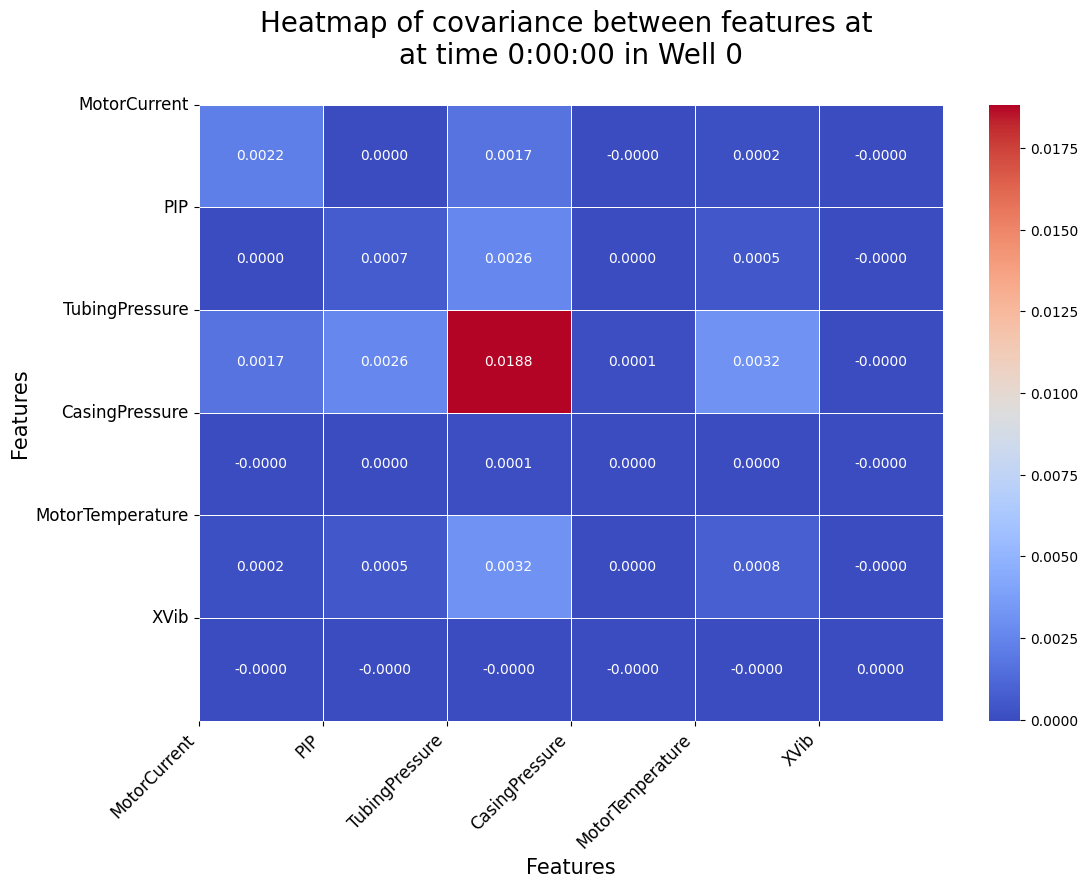

In [44]:
cov_matrix = get_varcov_and_plot_heatmap(data, features, label_column, wellno, time)

#### $\text{6.1.2 EigenValues and EigenVectors}$


In [19]:
eigenvalues_0_00, eigenvector_0_00 = eigenvalues_and_eigenvectors(cov_matrix)

Eigenvalues: [1.98872233e-02 2.07041010e-03 3.08810530e-04 2.56152163e-04
 5.31639906e-06 2.53674987e-07]

Cumulative Variance: [0.88277151 0.97467469 0.98838244 0.99975275 0.99998874 1.        ]

Eigenvectors: [[ 9.58420027e-02 -9.86713912e-01  1.29625079e-01 -1.78222612e-02
   9.42618705e-03 -9.04770230e-04]
 [ 1.34291262e-01  1.27087600e-01  7.87099917e-01 -5.88431206e-01
   8.31891357e-04 -6.02853315e-03]
 [ 9.72401672e-01  6.69038207e-02 -2.16929483e-01 -5.38076908e-02
  -2.23299739e-03  4.61514514e-04]
 [ 3.58992306e-03  1.04600696e-02  5.89468667e-03  1.25135128e-02
   9.99753983e-01 -1.33543052e-02]
 [ 1.64925592e-01  7.52205120e-02  5.62651183e-01  8.06365795e-01
  -1.46403375e-02  1.11774692e-02]
 [-1.34822262e-03 -8.58708913e-04 -1.24805446e-03 -1.23867986e-02
   1.35315409e-02  9.99829661e-01]]


#### $\text{6.1.3 Scree Plot}$


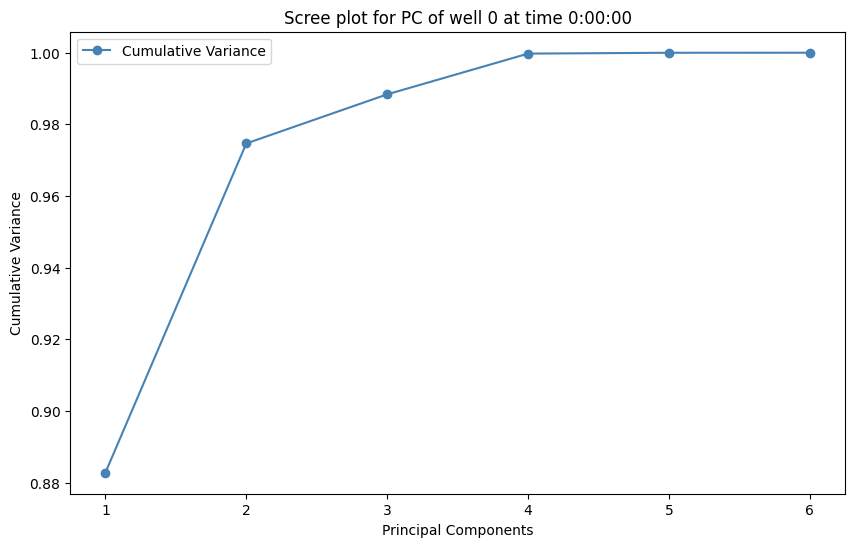

In [20]:
scree_plot(eigenvalues_0_00, wellno, time)

#### $\text{6.1.4 Principal Compnent Data Frame}$

In [21]:
k = 2
pca_df = get_pca_data(data, y, features, eigenvector_0_00, k)
pca_df

,PC1,PC2,Label
0,0.663323,-0.548604,0
1,0.688904,-0.547308,0
2,0.715220,-0.544093,0
3,0.691611,-0.546272,0
4,0.686657,-0.546937,0
...,...,...,...
93,0.463567,-0.574338,1
94,0.463407,-0.572693,1
95,0.491164,-0.571976,1
96,0.463244,-0.571016,1


#### $\text{6.1.5 Splitting PCA Data into Train and Test}$


In [22]:
train_data, test_data = create_stratified_train_test_data(pca_df, y, test_size=0.2, random_state=42)

Train Data:
Label
0    72
1     6
Name: count, dtype: int64
Shape of train data: (78, 3)

Test Data:
Label
0    18
1     2
Name: count, dtype: int64
Shape of test data: (20, 3)



#### $\text{6.1.6 Applying Logistic Regression Model}$


In [23]:
log_reg = logreg_model(train_data, label_column)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                   78
Model:                            GLM   Df Residuals:                       75
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16.025
Date:                Wed, 31 Jan 2024   Deviance:                       32.051
Time:                        16:50:35   Pearson chi2:                     37.6
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1232
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3985     17.535     -0.137      0.8

#### $\text{6.1.7 Evaluating Model over Test Data}$

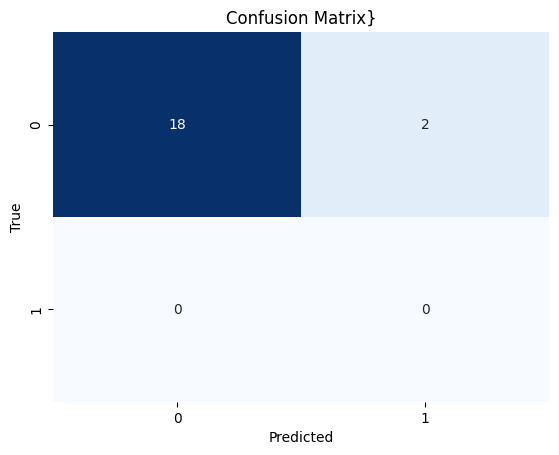

Accuracy: 0.90
F1 Score: 0.00


In [24]:
y_pred_0_00 = predict_logreg(log_reg, test_data, label_column)
evaluate_model(y_pred_0_00, test_data.Label)

### $\textbf{6.2 Well 0 at time 01:00:00}$

In [25]:
wellno = 0
time = 1

features = ['MotorCurrent', 'PIP', 'TubingPressure', 'CasingPressure', 'MotorTemperature', 'XVib']
label_column = 'Label'

data = subdf_by_time['01:00:00']
y = data[label_column]

#### $\text{6.2.1 Covariance Matrix}$

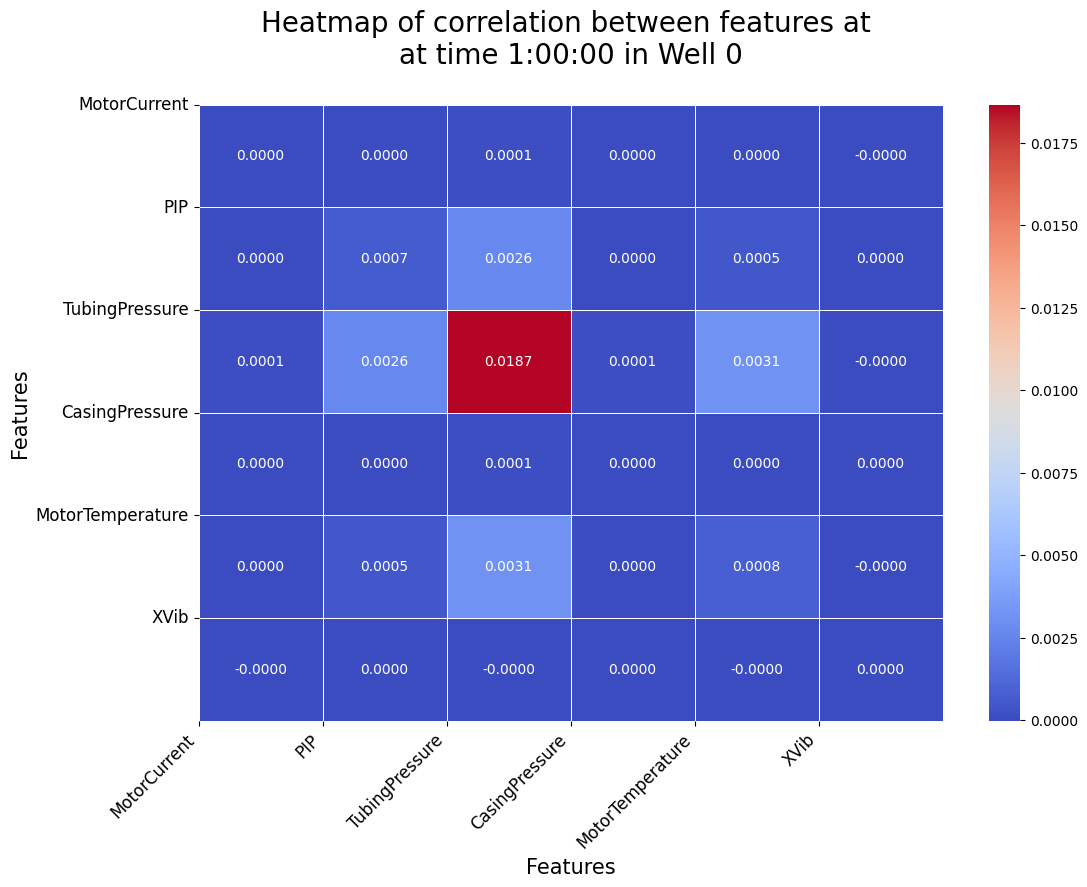

In [26]:
cov_matrix = get_varcov_and_plot_heatmap(data, features, label_column, wellno, time)


#### $\text{6.2.2 EigenValues and EigenVectors}$

In [27]:
eigenvalues_0_01, eigenvector_0_01 = eigenvalues_and_eigenvectors(cov_matrix)

Eigenvalues: [1.95710559e-02 3.21267193e-04 2.56722563e-04 4.93638831e-06
 2.70225274e-06 2.16504990e-07]

Cumulative Variance: [0.97093576 0.98687409 0.9996103  0.9998552  0.99998926 1.        ]

Eigenvectors: [[-3.55947028e-03  3.61243247e-03  3.16398213e-03  2.69763643e-02
   9.98615402e-01  4.47641018e-02]
 [-1.39277872e-01 -7.89342506e-01  5.97817561e-01 -3.60842772e-03
   1.09277985e-03 -1.18335348e-02]
 [-9.76081435e-01  2.11143610e-01  5.14372726e-02  3.95574340e-03
  -4.56113760e-03  1.07874807e-03]
 [-5.77688456e-03 -3.96933120e-03 -1.33058130e-02 -9.98963214e-01
   2.84645682e-02 -3.21884030e-02]
 [-1.66793040e-01 -5.76459503e-01 -7.99747871e-01  1.37133945e-02
   3.25527630e-03  8.90015737e-03]
 [ 8.64078265e-04 -4.73510151e-03  1.35889335e-02 -3.35864184e-02
  -4.38685846e-02  9.98368506e-01]]



#### $\text{6.2.3 Scree Plot}$


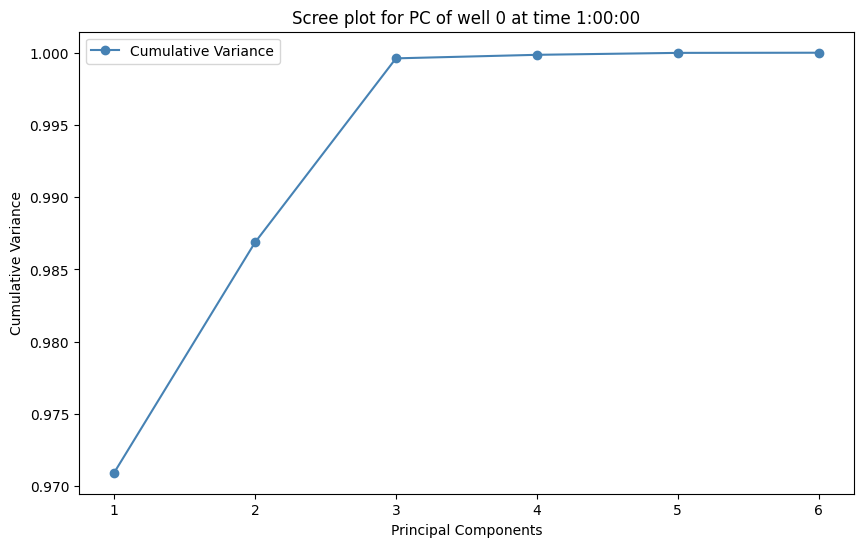

In [28]:
scree_plot(eigenvalues_0_01, wellno, time)

#### $\text{6.2.4 Principal Compnent Data Frame}$

In [29]:
k = 2
pca_df = get_pca_data(data, y, features, eigenvector_0_00, k)
pca_df

,PC1,PC2,Label
0,0.649350,-0.547742,0
1,0.688317,-0.547498,0
2,0.715158,-0.544151,0
3,0.687065,-0.546558,0
4,0.687117,-0.548638,0
...,...,...,...
92,0.463780,-0.576531,1
93,0.463549,-0.574155,1
94,0.448563,-0.574818,1
95,0.479712,-0.573332,1



#### $\text{6.2.5 Splitting PCA Data into Train and Test}$


In [30]:
train_data, test_data = create_stratified_train_test_data(pca_df, y, test_size=0.2, random_state=42)

Train Data:
Label
0    72
1     5
Name: count, dtype: int64
Shape of train data: (77, 3)

Test Data:
Label
0    18
1     2
Name: count, dtype: int64
Shape of test data: (20, 3)




#### $\text{6.2.6 Applying Logistic Regression Model}$


In [31]:
log_reg = logreg_model(train_data, label_column)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                   77
Model:                            GLM   Df Residuals:                       74
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.232
Date:                Wed, 31 Jan 2024   Deviance:                       26.463
Time:                        16:50:36   Pearson chi2:                     29.1
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1280
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -285.9776    162.590     -1.759      0.0

#### $\text{6.2.7 Evaluating Model over Test Data}$

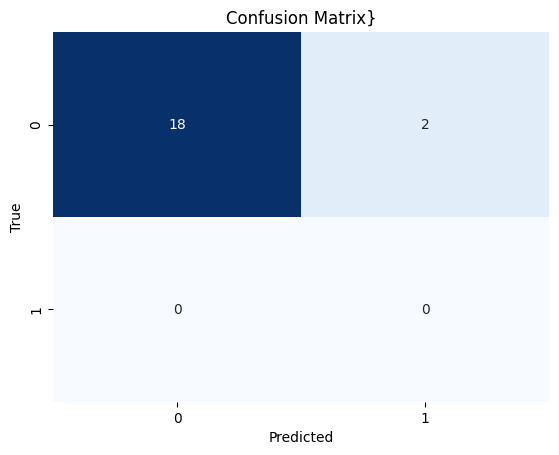

Accuracy: 0.90
F1 Score: 0.00


In [32]:
y_pred_0_00 = predict_logreg(log_reg, test_data, label_column)
evaluate_model(y_pred_0_00, test_data.Label)

### $\textbf{6.2 Well 0 over all Wells}$ 

In [33]:
wellno = 0
node_id = 0
time = None

features = ['MotorCurrent', 'PIP', 'TubingPressure', 'CasingPressure', 'MotorTemperature', 'XVib']
label_column = 'Label'

data = filter_data_by_node_id(df, node_id=node_id) 
y = data[label_column]

In [34]:
print("No of observation in data", data.shape)

No of observation in data (2329, 12)



#### $\text{6.2.1 Covariance Matrix}$


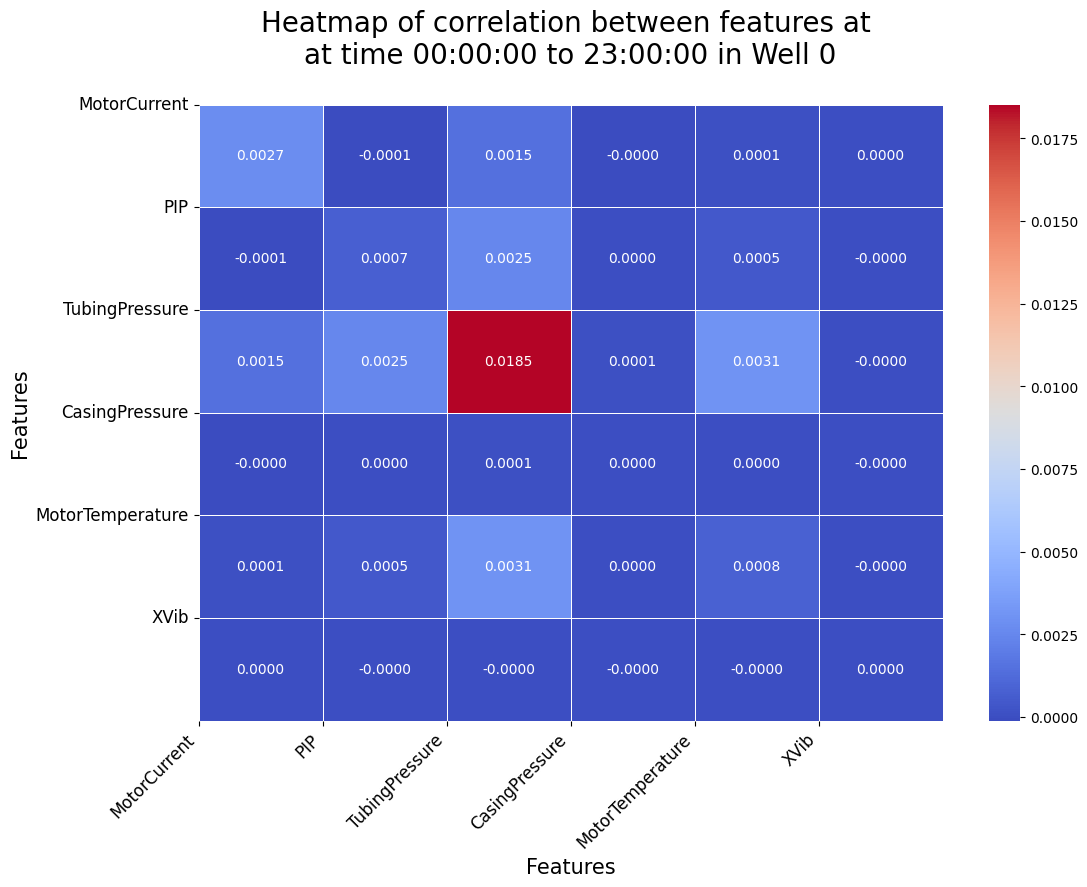

In [35]:
cov_matrix = get_varcov_and_plot_heatmap(data, features, label_column, wellno, time)

#### $\text{6.3.2 EigenValues and EigenVectors}$

In [36]:
eigenvalues_0_00, eigenvector_0_00 = eigenvalues_and_eigenvectors(cov_matrix)

Eigenvalues: [1.95066018e-02 2.66770821e-03 3.40333339e-04 2.68249460e-04
 5.91727587e-06 2.15690463e-07]

Cumulative Variance: [0.85596471 0.9730258  0.98795989 0.99973088 0.99999054 1.        ]

Eigenvectors: [[ 8.50317939e-02  9.86371755e-01 -1.39081575e-01 -1.80600218e-02
   1.30006626e-02 -1.21982631e-03]
 [ 1.33433638e-01 -1.38827031e-01 -8.36477639e-01 -5.13017750e-01
  -1.71168366e-03 -6.12676961e-03]
 [ 9.73863071e-01 -5.58523679e-02  2.08305654e-01 -7.12287542e-02
  -2.49881285e-03  4.54003971e-04]
 [ 5.52051308e-03 -1.48317383e-02 -1.09532521e-02  1.99959869e-02
   9.99613029e-01 -1.87680061e-03]
 [ 1.62863155e-01 -6.67642715e-02 -4.87287395e-01  8.54927094e-01
  -2.43146894e-02  8.80789333e-03]
 [-9.45073780e-04  9.38271004e-04 -1.11778166e-03 -1.06260510e-02
   2.09686763e-03  9.99939832e-01]]


#### $\text{6.3.3 Scree Plot}$


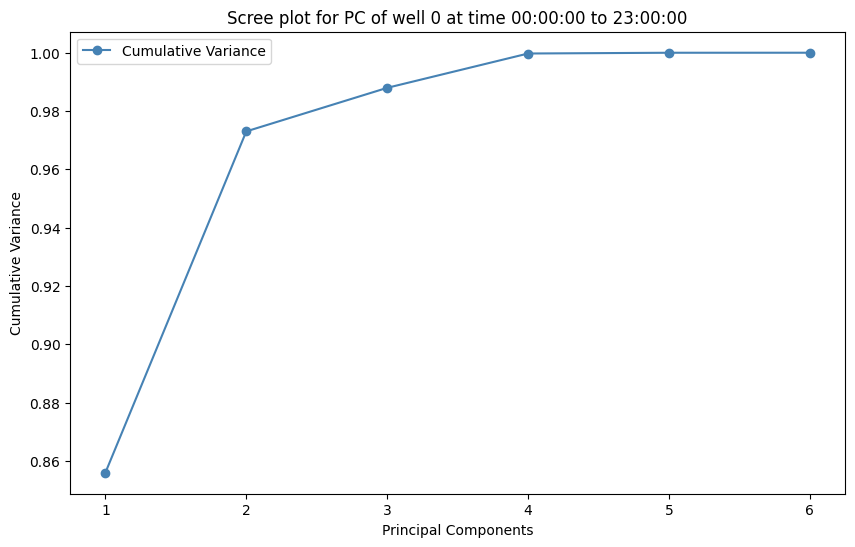

In [37]:
scree_plot(eigenvalues_0_00, wellno, time)

#### $\text{6.2.4 Principal Compnent Data Frame}$

In [38]:
k = 2
pca_df = get_pca_data(data, y, features, eigenvector_0_00, k)
pca_df

,PC1,PC2,Label
0,0.654562,0.556159,0
1,0.640588,0.555146,0
2,0.626605,0.554118,0
3,0.626560,0.556078,0
4,0.627566,0.555302,0
...,...,...,...
2324,0.428938,0.580318,1
2325,0.433153,0.579342,1
2326,0.429174,0.583057,1
2327,0.429143,0.582692,1


#### $\text{6.2.5 Splitting PCA Data into Train and Test}$

In [39]:
train_data, test_data = create_stratified_train_test_data(pca_df, y, test_size=0.2, random_state=42)

Train Data:
Label
0    1738
1     125
Name: count, dtype: int64
Shape of train data: (1863, 3)

Test Data:
Label
0    422
1     44
Name: count, dtype: int64
Shape of test data: (466, 3)



#### $\text{6.2.6 Applying Logistic Regression Model}$

In [40]:
log_reg = logreg_model(train_data, label_column)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                 1863
Model:                            GLM   Df Residuals:                     1860
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -342.03
Date:                Wed, 31 Jan 2024   Deviance:                       684.06
Time:                        16:50:37   Pearson chi2:                     908.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1175
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8721      1.443      5.456      0.0

#### $\text{6.2.7 Evaluating Model over Test Data}$

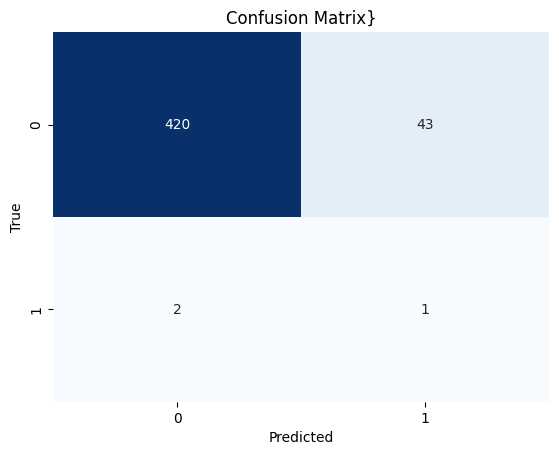

Accuracy: 0.90
F1 Score: 0.04


In [41]:
y_pred_0_00 = predict_logreg(log_reg, test_data, label_column)
evaluate_model(y_pred_0_00, test_data.Label)